In [23]:
#!pip install -r requirements.txt
from utils import *
from unet_whole_model import *
from dataset import *
import shutil

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Dataset

In [19]:
date = 'date0'
test_0_data_paths = load_paths_data(f'glaciers_mapping_downsampled/test/{date}')
test_gt_data_paths = load_paths_data('glaciers_mapping_downsampled/test/gt')
test0_dataset = PatchesDataset(test_0_data_paths,test_gt_data_paths, 'test0')
_, _ = test0_dataset.compute_means_and_stds()

Loading data: 100%|██████████| 351/351 [00:00<00:00, 57418.12it/s]


Loading groundtruths: 100%|██████████| 351/351 [00:00<00:00, 422.21it/s]


### Selecting one image

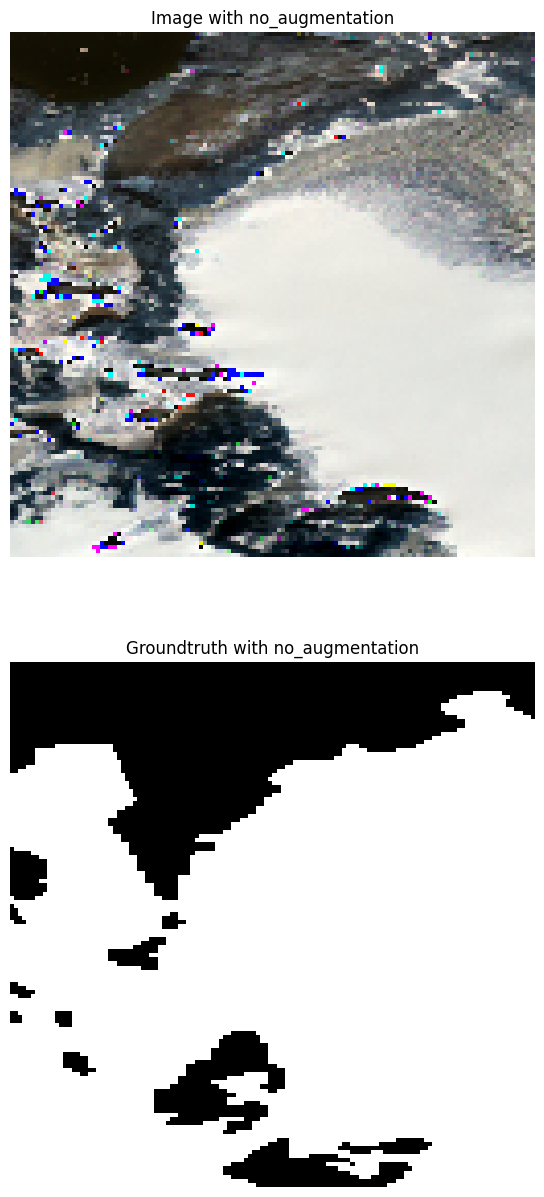

In [20]:
x_pos = 8
y_pos = 15

#Extracting the image form the dataset
img_lab_dict  = test0_dataset.get_at_pos(x_pos, y_pos)[0]

#Saving this image
source_path = f"glaciers_mapping_downsampled/test/{date}/patch_{x_pos}_{y_pos}.tif"
destination_path = "test_image.tif"
shutil.copy(source_path, destination_path)

#Plotting the image
test0_dataset.plot_at_pos(x_pos, y_pos)

### Loading trained model

In [21]:
lr = 8e-4 #Not used here but necessary to intanciate a model
model_name = 'augmented_model0'
model = Model(model_name,lr =lr)

#IMPORTANT note : the model musbe located in directory models/augmented_model0/

model_name_epoch = 'augmented_model0_epoch_15'
model.load_model(model_name_epoch)

### Make a prediction on the image:

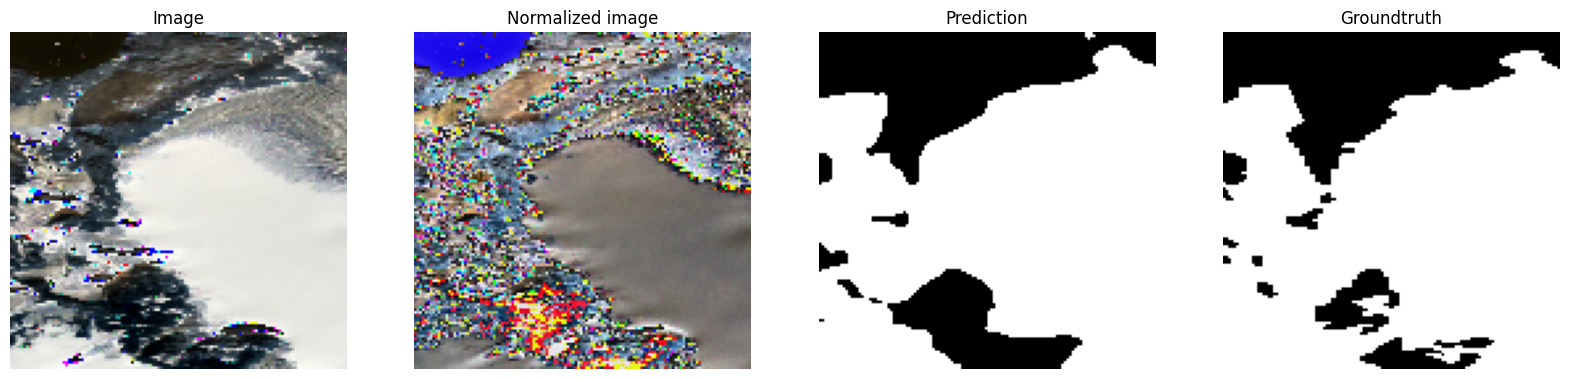

On this image: Accuracy: 0.91357, F1-score: 0.93977


In [22]:
model.plot_prediction(img_lab_dict)